In [2]:
%pylab inline
import numpy
import pandas as pd
import operator
from numpy import genfromtxt

Populating the interactive namespace from numpy and matplotlib


In [3]:
orbitTime = 90*60 #sec
sunTime = 59.6*60 #sec
eclipseTime = orbitTime-sunTime
cameraIdle = .7
cameraOn = 4
gpsOn = 1.5
adcsIdle = .087
MCU = .066
panelPower = 4
timePerKMPhoto = .1285
energyPerKMPhoto = timePerKMPhoto*cameraOn #J/km
bitsPerKMPhoto = 3*2048*8/.061
print bitsPerKMPhoto, r"bits/km"
timePerBit = 1/48000
antennaPower = 4
#linkTimePerKMPhoto = dataPerKMPhoto/bitrate
#IncomingPower = pd.read_csv('C:\Users\Brendan\Documents\MATLAB\incomingPower.csv')

IncomingPower = genfromtxt('C:\Users\Brendan\Documents\MATLAB\incomingPower.csv', delimiter=',')
modePower = pd.read_csv('C:\Users\Brendan\OneDrive\Documents\ModePowers.csv')
print modePower

#print shape(IncomingPower.values)
print IncomingPower
#IncomingPower = IncomingPower.values
print IncomingPower[1]

805770.491803 bits/km
   all values in W     1a     1b     1c     2a     2b     2c     2d     2e  \
0  Microcontroller  0.400  0.400  0.400  0.400  0.400  0.400  0.400  0.400   
1              EPS  0.100  0.100  0.100  0.100  0.100  0.100  0.100  0.100   
2              GPS  0.000  0.000  1.500  0.000  1.500  0.000  0.000  0.000   
3             ADCS  0.870  4.000  0.870  0.870  4.000  0.870  0.870  0.001   
4           Camera  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.700   
5      Transmitter  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   

      3a     3b    4a    4b  
0  0.400  0.400  0.40  0.40  
1  0.100  0.100  0.10  0.10  
2  1.500  1.500  1.50  0.00  
3  0.870  0.870  0.87  0.87  
4  0.700  4.000  0.00  0.00  
5  0.001  0.001  5.00  5.00  
[ 6.5448  6.5434  6.5421 ...,  3.1296  3.1487  3.1677]
6.5434


In [4]:
print modePower['1a']
print sum(modePower['2a'])

0    0.400
1    0.100
2    0.000
3    0.870
4    0.000
5    0.001
Name: 1a, dtype: float64
1.371


In [5]:
def solarPower(t):
    if t%orbitTime < sunTime:
        return panelPower
    else:
        return 0
def idlePower(t):
    return cameraIdle+gpsOn+MCU+adcsIdle
def getDE(t):
    return solarPower(t) - idlePower(t)

In [8]:
def getTotalPhotoPower(length):
    return energyPerKMPhoto/3600 + antennaPower*timePerBit*bitsPerKMPhoto*length/3600
print getTotalPhotoPower(1)
print totPower[orbitTime-1]/3600
print getTotalPhotoPower(1)/totPower[orbitTime-1]/3600


4*16.8/3600
25.6*4/200/3600

0.000142777777778


NameError: name 'totPower' is not defined

In [9]:
times = arange(0,orbitTime*5)
DE = zeros(size(times))
totPower = zeros(size(times))
for i in times:
    DE[i] = getDE(i)
    
for i in arange(1,size(DE)):
    totPower[i] = totPower[i-1] + DE[i]


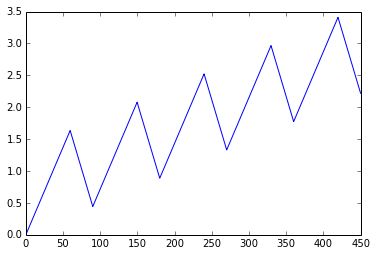

In [10]:
plot(times/60., totPower/3600.)

In [37]:
plot?
colors = ['b','g','r','c','m','y','k','w']
styles = ['-','--','-.',':']
colorstyles = []
for x in styles:
    for y in colors:
        colorstyles.append(y+x)
print colorstyles
plot?

['b-', 'g-', 'r-', 'c-', 'm-', 'y-', 'k-', 'w-', 'b--', 'g--', 'r--', 'c--', 'm--', 'y--', 'k--', 'w--', 'b-.', 'g-.', 'r-.', 'c-.', 'm-.', 'y-.', 'k-.', 'w-.', 'b:', 'g:', 'r:', 'c:', 'm:', 'y:', 'k:', 'w:']


In [189]:
class Mode:
    def __init__(self, p,n):
        self.power = p
        self.name = n
class ImplementedMode(Mode):
    
    def __init__(self, p,n,l,t,s):
        self.length = l
        self.time = t
        self.power = p
        self.name = n
        self.style = s
        self.totpower = sum(self.power)
    def getlen(self):
        return self.length
    def setlen(self,l):
        self.length = len
    def getpower(self):
        return self.power
    def setpower(self,p):
        self.power = p
    def getname(self):
        return self.name
    def setname(self,n):
        self.name = n
    def gettotpower(self):
        return self.totpower
    def gettime(self):
        return self.time
    
class ColorStyle:
    used = False
    combo = 'b-'
    def __init__(self, c, u):
        self.used = u
        self.combo = c
modes = {0:'1a',1:'1b',2:'1c',3:'2a',4:'2b',5:'2c',6:'2d',7:'2e',8:'3a',9:'3b',10:'4a',11:'4b'}
modes_str = {v: k for k, v in modes.items()}
mode_styles = {0:'y*',1:'y*',2:'y-',3:'g-',4:'g:',5:'g-.',6:'g--',7:'r-',8:'b:',9:'b-',10:'m--',11:'m-'}
class Simulation:
    def __init__(self,*args):
        self.ImplementedModes = []
        self.modes = {0:'1a',1:'1b',2:'1c',3:'2a',4:'2b',5:'2c',6:'2d',7:'2e',8:'3a',9:'3b',10:'4a',11:'4b'}
        self.modes_str = {v: k for k, v in modes.items()}
        self.mode_styles = {0:'y*',1:'y*',2:'y-',3:'g.',4:'g:',5:'g-.',6:'g--',7:'r*',8:'b:',9:'b-',10:'m--',11:'m-'}
    def addMode(self, p,n,l,t,s):
        self.ImplementedModes.append(ImplementedMode(p,n,l,t,s))
        self.ImplementedModes.sort(key=operator.attrgetter("time"), reverse=False)
    def markModes(self,totLen):
        x = zeros(totLen)
        x[:] = 3
        for m in self.ImplementedModes:
            #print m.gettime()
            #print m.getlen()
            #print m.getname()
            #print self.modes[m.getname()]
            #print self.modes_str
            x[m.gettime():m.gettime()+m.getlen()] = modes_str[m.getname()]
        return x
    def PlotModes(self,incomingPower):
        times = arange(0,len(incomingPower))
        markedModes = self.markModes(len(incomingPower))
        
        battEnergy = zeros(len(incomingPower)+1)
        battEnergy[0] = 5*3600
        netPower = zeros(len(incomingPower))
        print type(netPower)
        print type(incomingPower)
        print type((self.ImplementedModes[0].gettotpower))
        for m in self.ImplementedModes:
            for x in arange(m.gettime(),m.gettime()+m.getlen()):
                netPower[x] = incomingPower[x]-m.gettotpower()
                
                
        print netPower
        for x in arange(0,len(netPower)-1):
            battEnergy[x+1] = netPower[x]+battEnergy[x]
        indices = [[] for i in range(12)]
        indices[0] = np.where(markedModes == 0)[0]
        indices[1] = np.where(markedModes == 1)[0]
        indices[2] = np.where(markedModes == 2)[0]
        indices[3] = np.where(markedModes == 3)[0]
        indices[4] = np.where(markedModes == 4)[0]
        indices[5] = np.where(markedModes == 5)[0]
        indices[6] = np.where(markedModes == 6)[0]
        indices[7] = np.where(markedModes == 7)[0]
        indices[8] = np.where(markedModes == 8)[0]
        indices[9] = np.where(markedModes == 9)[0]
        indices[10] = np.where(markedModes == 10)[0]
        indices[11] = np.where(markedModes == 11)[0]
        figure(figsize =(18,8))
        for x in arange(0,len(indices)-1):
            if len(indices[x]) > 0:
                plot(times[indices[x]],battEnergy[indices[x]]/3600,self.mode_styles[x], label = self.modes[x])
        legend(loc = 'best')
        print markedModes
        print battEnergy
        print indices
        figure()
        plot(times, netPower)
            #plot(times[m.getTime:m.getTime+m.getLength],battEnergy[m.getTime+1:m.getTime+m.getLength+1],m.getStyle,label = m.getName)
    

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'instancemethod'>
[ 0.  0.  0. ...,  0.  0.  0.]
[ 3.  3.  3. ...,  3.  3.  3.]
[ 18000.          18000.          18000.         ...,  15800.91338097
  15800.91338097      0.        ]
[array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([   0,    1,    2, ..., 6997, 6998, 6999], dtype=int64), array([  60,   61,   62, ..., 1797, 1798, 1799], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([1800, 1801, 1802, ..., 5397, 5398, 5399], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64)]


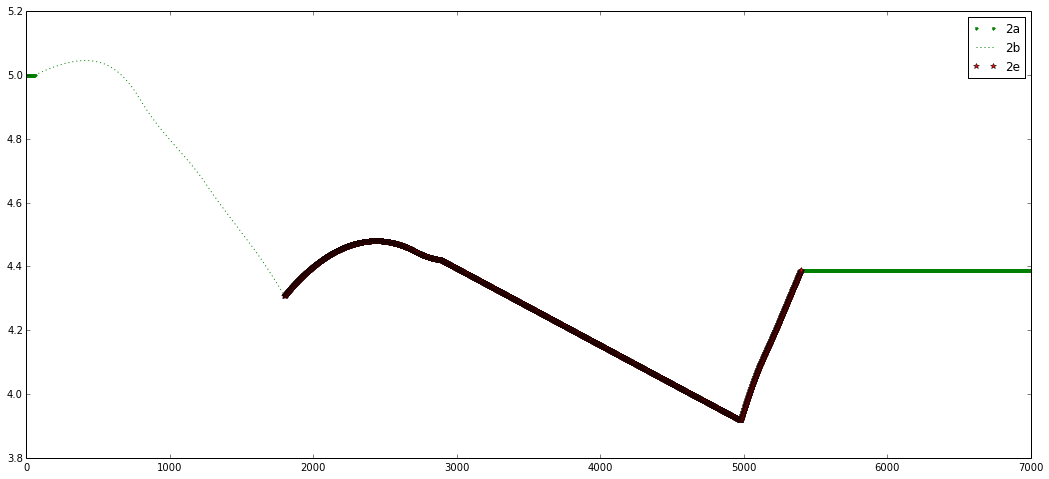

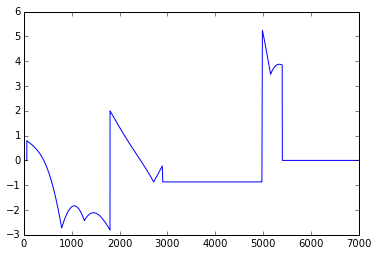

In [190]:
S = Simulation()
S.addMode(modePower['2b'],'2b',3000,60,'b-')
S.addMode(modePower['2e'],'2e',3600,1800,'r-')
S.PlotModes(IncomingPower[:7000])
##Have to have recovery time 

1000
1000



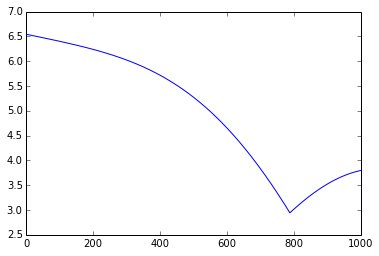

In [188]:
times = arange(0,len(IncomingPower)-1)
print size(times[0:1000])
print size(IncomingPower[0:1000])
print 
plot(times[0:1000],IncomingPower[0:1000])

In [182]:
names = array(["1a","1b","1c","2a","2b","2c","2d","2e","3a","3b","4a",
               "4b"])
power = array([3.863,-3.737,3.863,3.863,3.863,3.863,3.863,-6.137,-3.737,.563,
         -1.136,-1.136])
power = power - .2
power = power - 7.0 + 6.0
power[7]=-6.137+3
print power
modes = dict(zip(names, power))
orbitTime = 90*60
eclipseTime = int((90-59.6)*60)

[ 2.663 -4.937  2.663  2.663  2.663  2.663  2.663 -3.137 -4.937 -0.637
 -2.336 -2.336]


1.05583333333


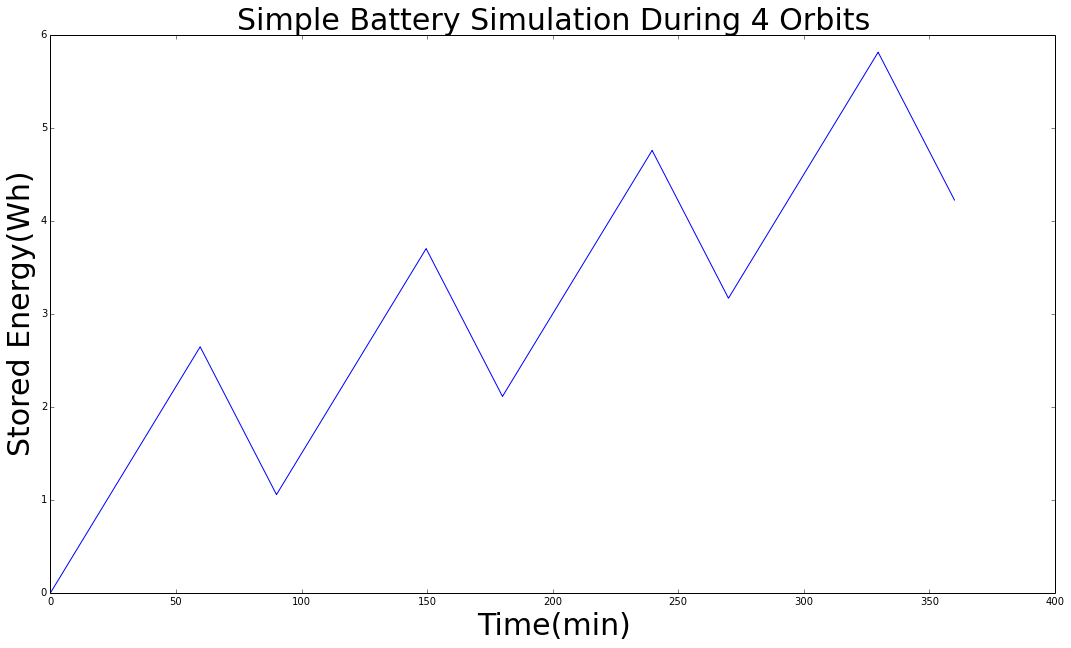

In [17]:
O.printBattery()


O.printBattery()


In [15]:
6.33*sunTime/3600

6.287800000000001

In [16]:
(6.337*(orbitTime-sunTime)+4.163*sunTime)/3600

7.345993333333333